In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
from math import ceil

# IT'S ONLY VALID FOR SERVERLESS V4 DATA
start = datetime(2022, 12, 28, 9, 00)
test_duration = np.timedelta64(8, 'h')

def to_delta(df, column):
    df[column] = df[column].apply(lambda dt: dt - start)
    df.set_index(column, inplace=True, drop=False)

def load_cloudwatch(filename):
    logs = pd.read_csv(filename)
    logs = logs.sort_values(by='timestamp')
    logs['timestamp'] = pd.to_datetime(logs['timestamp'])
    logs = logs[logs['timestamp'] > start]
    to_delta(logs, 'timestamp')
    return logs

def start_plot():
    fig, ax = plt.subplots()
    ax.set_xlabel("Czas trwania testu [h]")

    return (fig, ax)

def human_delta(index):
    return index.get_level_values('timestamp').seconds / 60 / 60

In [9]:
prefix = 'ec2_v1_steady_data/'

cpu = load_cloudwatch(f"{prefix}/cpu.csv")
cpu = cpu.resample('10T').median(numeric_only=True)

mem = load_cloudwatch(f"{prefix}/ram.csv")
mem = mem.resample('10T').median(numeric_only=True)

2022-12-28 09:00:00
2022-12-28 09:00:00


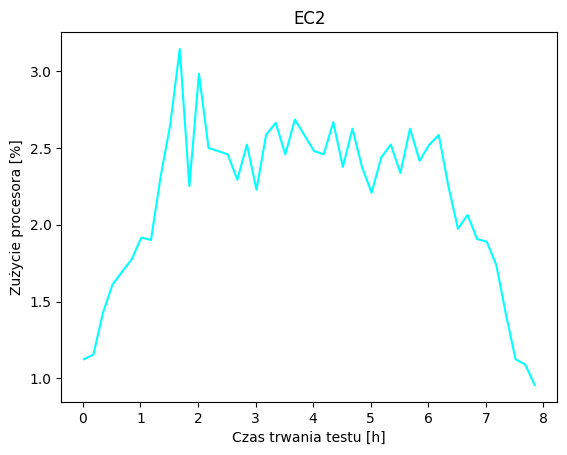

In [25]:
fig, ax = start_plot()

ax.plot(human_delta(cpu.index), cpu['cpuUtilization'], color='cyan')
ax.set_ylabel("Zużycie procesora [%]")
fig.savefig("charts/steady/ec2/cpu.png")


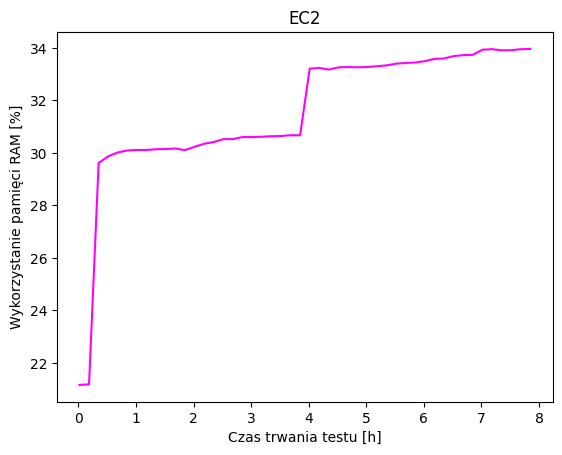

In [24]:
fig, ax = start_plot()

ax.plot(human_delta(mem.index), mem['memUsedPercent'], color='magenta')
ax.set_ylabel("Wykorzystanie pamięci RAM [%]")
fig.savefig("charts/steady/ec2/ram.png")